## LSA & LDA

In [234]:
# addapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

### Overview: document-term matrix (BoW model), dimensionality reduction with truncated SVD. 
#### TODO: Need to add a metric for all implementations to compare. Also need to extract document probablility for each cluster and 

In [235]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd

### Stopwords, Stem, and Tokenize

In [236]:
sw = stopwords.words('english')
ADDITIONAL_STOPWORDS = ['version', '3','keyword','data', 'computer', 'program', 'input', 'file', 'output', '13', '4','upw', 'package', '5', 'u', 'x', '5m', 'grid', 'document', 'report', 'provide', 'area', 'many', 'used', 'including', 'designed', 'u', 'gi']
sw = sw + ADDITIONAL_STOPWORDS


In [237]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(sw)
    # Create p_stemmer of class PorterStemmer
    p_stemmer = SnowballStemmer("english") #PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

### Prepare Document Term Matrix (BoW model)

In [238]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


### LSA Model

In [239]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
#     print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

### Explore # of Topics

In [240]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [241]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

### Load Data & Run

In [242]:
df = pd.read_csv('abstracts.csv')
titles = df.Title.values
document_list = df.Text.values
number_of_topics=5
words=10
# document_list,titles=load_data("","articles.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

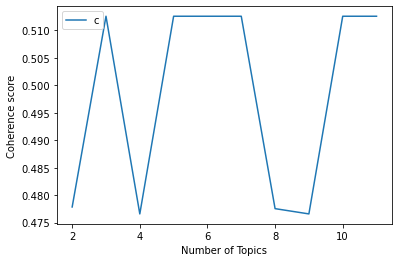

In [243]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

### According to the above graph, the highest coherence scores are for 5, 8 and 9 topics though it seems to change on each iteration.  Note that the score for 2 groups and 10 groups are abount the same.
### Another run: 3, 5, 9, 10, 11!!
### With the Snowball Stemmer: 4, 5, 6, 8, 10

In [244]:
number_of_topics = 5
words=14
lsamodel = create_gensim_lsa_model(clean_text,number_of_topics,words)
for idx, topic in lsamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.521*"model" + 0.239*"speci" + 0.196*"water" + 0.170*"transport" + 0.169*"simul" + 0.169*"calcul" + 0.145*"result" + 0.137*"use" + 0.119*"solut" + 0.117*"phreeqc"
Topic: 1 
Words: -0.468*"speci" + -0.304*"fish" + -0.226*"percent" + -0.192*"climat" + -0.177*"water" + -0.167*"stream" + -0.164*"km" + -0.141*"occurr" + -0.140*"000" + 0.130*"transport"
Topic: 2 
Words: -0.301*"model" + 0.235*"calcul" + 0.216*"speci" + 0.212*"phreeqc" + -0.193*"veget" + 0.191*"aqueous" + -0.186*"predict" + 0.173*"isotop" + -0.129*"wave" + -0.126*"aquat"
Topic: 3 
Words: 0.374*"flow" + 0.341*"modflow" + 0.194*"solver" + 0.187*"nwt" + 0.187*"lpf" + -0.184*"model" + 0.138*"problem" + 0.135*"groundwat" + 0.122*"conduct" + 0.118*"simul"
Topic: 4 
Words: 0.255*"wave" + -0.240*"veget" + 0.208*"coupl" + 0.190*"transport" + -0.178*"predict" + 0.171*"ocean" + 0.162*"simul" + -0.158*"aquat" + 0.149*"atmospher" + -0.147*"use"


In [245]:
number_of_topics = 10
words=14
lsamodel = create_gensim_lsa_model(clean_text,number_of_topics,words)
for idx, topic in lsamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.521*"model" + 0.239*"speci" + 0.196*"water" + 0.170*"transport" + 0.169*"simul" + 0.169*"calcul" + 0.145*"result" + 0.137*"use" + 0.119*"solut" + 0.117*"phreeqc"
Topic: 1 
Words: -0.468*"speci" + -0.304*"fish" + -0.226*"percent" + -0.192*"climat" + -0.177*"water" + -0.167*"stream" + -0.164*"km" + -0.141*"occurr" + -0.140*"000" + 0.130*"transport"
Topic: 2 
Words: -0.301*"model" + 0.235*"calcul" + 0.216*"speci" + 0.212*"phreeqc" + -0.193*"veget" + 0.191*"aqueous" + -0.186*"predict" + 0.173*"isotop" + -0.129*"wave" + -0.126*"aquat"
Topic: 3 
Words: 0.374*"flow" + 0.341*"modflow" + 0.194*"solver" + 0.187*"nwt" + 0.187*"lpf" + -0.184*"model" + 0.138*"problem" + 0.135*"groundwat" + 0.122*"conduct" + 0.118*"simul"
Topic: 4 
Words: 0.255*"wave" + -0.240*"veget" + 0.208*"coupl" + 0.190*"transport" + -0.178*"predict" + 0.171*"ocean" + 0.162*"simul" + -0.158*"aquat" + 0.149*"atmospher" + -0.147*"use"
Topic: 5 
Words: 0.451*"map" + 0.257*"count" + 0.225*"circl" + 0.193*"isoplet

## LDA Model

In [247]:
import gensim
from gensim.utils import simple_preprocess
dictionary,doc_term_matrix=prepare_corpus(clean_text)
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.013*"model" + 0.012*"calcul" + 0.009*"flow" + 0.009*"phreeqc" + 0.008*"use" + 0.008*"aqueous" + 0.008*"transport" + 0.007*"isotop" + 0.006*"psd" + 0.006*"specif"
Topic: 1 
Words: 0.016*"model" + 0.012*"flow" + 0.010*"transport" + 0.008*"simul" + 0.007*"water" + 0.007*"modflow" + 0.006*"result" + 0.005*"allow" + 0.005*"solut" + 0.005*"predict"
Topic: 2 
Words: 0.028*"model" + 0.013*"speci" + 0.011*"water" + 0.009*"predict" + 0.008*"wave" + 0.008*"develop" + 0.007*"fish" + 0.007*"simul" + 0.007*"use" + 0.007*"climat"
Topic: 3 
Words: 0.019*"model" + 0.013*"simul" + 0.009*"map" + 0.008*"water" + 0.008*"size" + 0.006*"dimension" + 0.006*"transport" + 0.006*"zone" + 0.006*"migrat" + 0.005*"balanc"
Topic: 4 
Words: 0.013*"model" + 0.013*"use" + 0.008*"precipit" + 0.008*"simul" + 0.007*"flow" + 0.007*"threshold" + 0.007*"boundari" + 0.007*"includ" + 0.007*"system" + 0.007*"softwar"


In [231]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"size" + 0.009*"scoops3d" + 0.008*"migrat" + 0.008*"precipit" + 0.008*"threshold" + 0.008*"model" + 0.008*"softwar" + 0.007*"use" + 0.007*"user" + 0.006*"landslid"
Topic: 1 
Words: 0.026*"model" + 0.010*"speci" + 0.010*"water" + 0.008*"simul" + 0.008*"flow" + 0.008*"transport" + 0.007*"predict" + 0.007*"stream" + 0.007*"wave" + 0.006*"chang"
Topic: 2 
Words: 0.021*"model" + 0.014*"transport" + 0.012*"map" + 0.012*"simul" + 0.011*"water" + 0.008*"solut" + 0.007*"applic" + 0.007*"use" + 0.007*"count" + 0.006*"exampl"
Topic: 3 
Words: 0.017*"model" + 0.013*"simul" + 0.009*"calcul" + 0.008*"transport" + 0.007*"dimension" + 0.007*"flow" + 0.006*"condit" + 0.006*"solut" + 0.006*"includ" + 0.006*"multipl"
Topic: 4 
Words: 0.016*"model" + 0.011*"flow" + 0.009*"modflow" + 0.009*"veget" + 0.009*"use" + 0.008*"simul" + 0.007*"conduct" + 0.007*"system" + 0.007*"predict" + 0.007*"reef"


In [248]:
for index, score in sorted(lda_model[doc_term_matrix[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9919432401657104	 
Topic: 0.013*"model" + 0.013*"use" + 0.008*"precipit" + 0.008*"simul" + 0.007*"flow" + 0.007*"threshold" + 0.007*"boundari" + 0.007*"includ" + 0.007*"system" + 0.007*"softwar"


In [249]:
for index, score in sorted(lda_model[doc_term_matrix[19]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9807340502738953	 
Topic: 0.013*"model" + 0.012*"calcul" + 0.009*"flow" + 0.009*"phreeqc" + 0.008*"use" + 0.008*"aqueous" + 0.008*"transport" + 0.007*"isotop" + 0.006*"psd" + 0.006*"specif"


In [250]:
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# test on new doc